# Tour de Learning Classifers
## 3-1 Training a Perceptron via Scikit Learn

In [1]:
from sklearn import datasets
import numpy as np

###### Data Prep #####
iris = datasets.load_iris()
x = iris.data[:, [2,3]]
y = iris.target

#simple 70/30 train/test random splitting
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#Applying feature scaling to data set
## Example: http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:

##### Perceptron #######
# One-vs-Rest OvR method for multiclass classification
## Decides whether an input, represented by a vector of numbers, belongs to some specific class or not

from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)

# now train via the fit method #
ppn.fit(x_train_std, y_train)

# predict #
## %d is placeholder for number / %s placeholder for string
y_pred = ppn.predict(x_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print 'Accuracy Score: ' + str((1.0-((y_test != y_pred).sum()*1.0)/(y_test.size*1.0)).round(2)*100) + '%'
#or import default performance metrics
from sklearn.metrics import accuracy_score
print('Accuracy Score de sklearn: %.2f' % accuracy_score(y_test, y_pred))
#PSA: need to beware of over-fitting!

Misclassified samples: 4
Accuracy Score: 91.0%
Accuracy Score de sklearn: 0.91


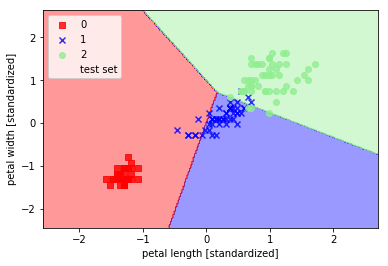

In [3]:

##### Visualize Decision Regions of Perceptron #####
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# setup marker generator and color map #
def plot_decision_regions(x, y, classifier, test_idx=None, resolution=0.02):

    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface #
    x1_min, x1_max = x[:,0].min()-1,x[:,0].max()+1
    x2_min, x2_max = x[:,1].min()-1,x[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max, resolution),
                           np.arange(x2_min,x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    # plot los samples #
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl,0],y=x[y==cl,1],
                    alpha=0.8,
                    c=cmap(idx),
                    marker=markers[idx],
                    label=cl)

    # highlight test samples #
    if test_idx:
        x_test, y_test = x[test_idx,:],y[test_idx]
        plt.scatter(x_test[:,0],x_test[:,1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55,
                    label='test set')
    
# Now specify indices for plt #
x_combined_std = np.vstack((x_train_std,x_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(x=x_combined_std,
                     y=y_combined,
                     classifier=ppn,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()



# Tour de Learning Classifers
## 3-2 Modeling class probabilities via logistic regression

logit(p) = log${\frac{p}{1-p}}$

inverse logit becomes logistic: $\phi(z)={\frac{1}{1+e^{-z}}}$

### Plot Sigmoid function (inverse logit aka logistic) to see how it looks
$\phi\to 1$ as $z\to\infty$

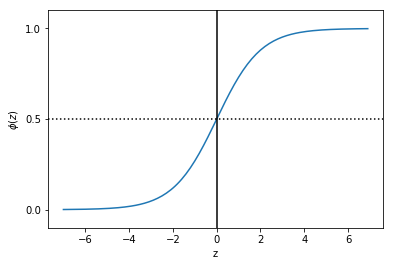

In [4]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))
z=np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.axhspan(0.0,1.0,facecolor='1.0',alpha=1.0,ls='dotted')
plt.axhline(y=0.5,ls='dotted',color='k')
plt.yticks([0.0,0.5,1.0])
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()


### Training a logistic with scikit-learn

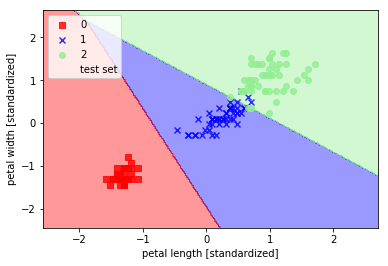

In [6]:
from sklearn.linear_model import LogisticRegression
#C is mysterious parameter being defined
#random_state=0 
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(x_train_std,y_train)
plot_decision_regions(x_combined_std,
                     y_combined,
                     classifier=lr,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [8]:
# Display prediction probabilities #
lr.predict_proba(x_test_std[0,:])

/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

### Tracking overfitting via regularization